In [ ]:
!pip install pandas


In [ ]:
#Creating dataset
import pandas as pd
data = {
    'Day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'],
    'Selling value': ['80','90','100','np.nan','np.nan','100','110']
}

df = pd.DataFrame(data)

print(df)


         Day Selling value
0     Sunday            80
1     Monday            90
2    Tuesday           100
3  Wednesday        np.nan
4   Thursday        np.nan
5     Friday           100
6   Saturday           110


In [ ]:

import pandas as pd
import numpy as np
data = {
    'Day': ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'],
    'Selling value': ['80','90','100','np.nan','np.nan','100','110']
}

df = pd.DataFrame(data)

df['Selling value'] = pd.to_numeric(df['Selling value'], errors='coerce')

df['Selling value'] = df['Selling value'].fillna(df['Selling value'].mean())
print("\nDataset after Filling Missing Values with Mean:")
print(df)



Dataset after Filling Missing Values with Mean:
         Day  Selling value
0     Sunday           80.0
1     Monday           90.0
2    Tuesday          100.0
3  Wednesday           96.0
4   Thursday           96.0
5     Friday          100.0
6   Saturday          110.0


In [ ]:

df['Selling value'] = df['Selling value'].fillna(method='ffill')
print("\nDataset after Forward Filling:")
print(df)


df['Selling value'] = df['Selling value'].fillna(method='bfill')
print("\nDataset after Backward Filling:")
print(df)



Dataset after Forward Filling:
         Day  Selling value
0     Sunday           80.0
1     Monday           90.0
2    Tuesday          100.0
3  Wednesday          100.0
4   Thursday          100.0
5     Friday          100.0
6   Saturday          110.0

Dataset after Backward Filling:
         Day  Selling value
0     Sunday           80.0
1     Monday           90.0
2    Tuesday          100.0
3  Wednesday          100.0
4   Thursday          100.0
5     Friday          100.0
6   Saturday          110.0


<ipython-input-16-929feb2ada73>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Selling value'] = df['Selling value'].fillna(method='ffill')
<ipython-input-16-929feb2ada73>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Selling value'] = df['Selling value'].fillna(method='bfill')


In [ ]:
import pandas as pd
import numpy as np

# Create a dataset with missing Date and Time values
data = {
    'Date': ['2025-01-01', np.nan, '2025-01-03', '2025-01-04', np.nan],
    'Time': ['10:00', '11:00', np.nan, '13:00', '14:00'],
}

df = pd.DataFrame(data)

# Fill missing Date and Time using forward fill (ffill)
df['Date'] = df['Date'].fillna(method='ffill')
df['Time'] = df['Time'].fillna(method='ffill')

print(df)


         Date   Time
0  2025-01-01  10:00
1  2025-01-01  11:00
2  2025-01-03  11:00
3  2025-01-04  13:00
4  2025-01-04  14:00


<ipython-input-21-ec07ffc67436>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'] = df['Date'].fillna(method='ffill')
<ipython-input-21-ec07ffc67436>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Time'] = df['Time'].fillna(method='ffill')


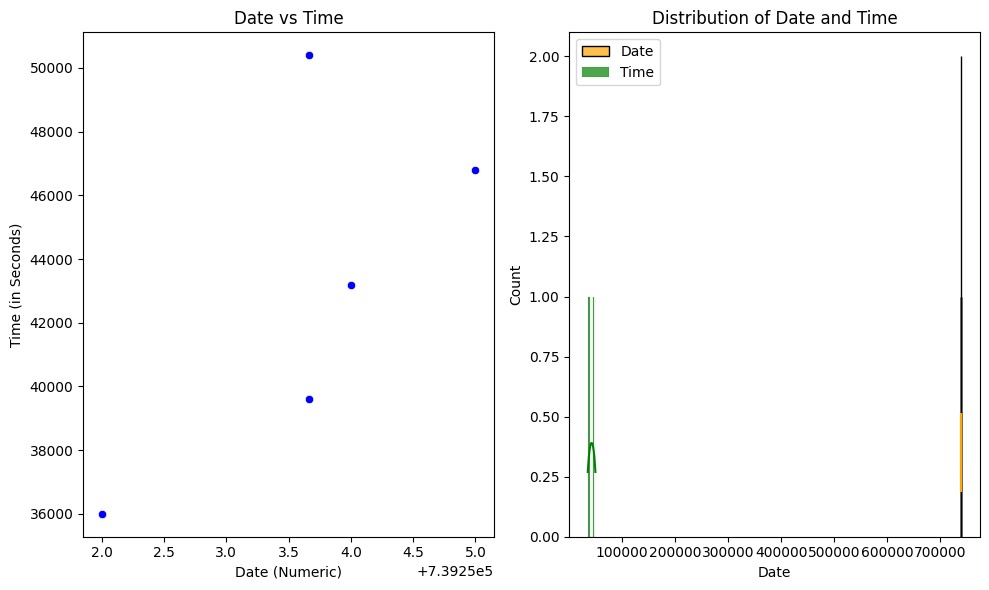

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dataset with missing Date and Time values
data = {
    'Date': ['2025-01-01', np.nan, '2025-01-03', '2025-01-04', np.nan],
    'Time': ['10:00', '11:00', np.nan, '13:00', '14:00'],
}

df = pd.DataFrame(data)

# Convert 'Date' to numeric (ordinal) and 'Time' to seconds
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')

# Convert Date to ordinal (numeric)
df['Date'] = df['Date'].map(lambda x: x.toordinal() if pd.notnull(x) else np.nan)

# Convert Time to total seconds (numeric)
df['Time'] = df['Time'].dt.hour * 3600 + df['Time'].dt.minute * 60

# Fill missing values using the mean
df['Date'] = df['Date'].fillna(df['Date'].mean())
df['Time'] = df['Time'].fillna(df['Time'].mean())

# Visualize the dataset
plt.figure(figsize=(10, 6))

# Plot Date vs Time
plt.subplot(1, 2, 1)
sns.scatterplot(x='Date', y='Time', data=df, color='blue')
plt.title('Date vs Time')
plt.xlabel('Date (Numeric)')
plt.ylabel('Time (in Seconds)')

# Plot Distribution of Date and Time
plt.subplot(1, 2, 2)
sns.histplot(df['Date'], kde=True, color='orange', label='Date', bins=10, alpha=0.7)
sns.histplot(df['Time'], kde=True, color='green', label='Time', bins=10, alpha=0.7)
plt.legend()
plt.title('Distribution of Date and Time')

plt.tight_layout()
plt.show()
